# Case Study on Testing of Hypothesis

A company started to invest in digital marketing as a new way of their product
promotions.For that they collected data and decided to carry out a study on it.

● The company wishes to clarify whether there is any increase in sales after
stepping into digital marketing.

● The company needs to check whether there is any dependency between the
features “Region” and “Manager”.

Help the company to carry out their study with the help of data provided.


In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

## Read the data set to python environment

In [4]:
data  = pd.read_csv('Sales_add.csv')

In [5]:
data.head()

,Month,Region,Manager,Sales_before_digital_add(in $),Sales_After_digital_add(in $)
0,Month-1,Region - A,Manager - A,132921,270390
1,Month-2,Region - A,Manager - C,149559,223334
2,Month-3,Region - B,Manager - A,146278,244243
3,Month-4,Region - B,Manager - B,152167,231808
4,Month-5,Region - C,Manager - B,159525,258402


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22 entries, 0 to 21
Data columns (total 5 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   Month                           22 non-null     object
 1   Region                          22 non-null     object
 2   Manager                         22 non-null     object
 3   Sales_before_digital_add(in $)  22 non-null     int64 
 4   Sales_After_digital_add(in $)   22 non-null     int64 
dtypes: int64(2), object(3)
memory usage: 1008.0+ bytes


In [7]:
# Checking for the null values
data.isnull().sum()

Month                             0
Region                            0
Manager                           0
Sales_before_digital_add(in $)    0
Sales_After_digital_add(in $)     0
dtype: int64

In [9]:
# Descriptive Statistics
data.describe()

,Sales_before_digital_add(in $),Sales_After_digital_add(in $)
count,22.000000,22.000000
mean,149239.954545,231123.727273
std,14844.042921,25556.777061
min,130263.000000,187305.000000
25%,138087.750000,214960.750000
50%,147444.000000,229986.500000
75%,157627.500000,250909.000000
max,178939.000000,276279.000000


Insight
1. There are 22 rows and 5 columns
2. The average sales value have icreased from 149239.95$ to 231123.72$ after the introduction of digital marketing

## 1. The company wishes to clarify whether there is any increase in sales after stepping into digital marketing.


### The sample size is less than 30, so we perform one tailed sample T- test

Hypothesis:
    
    H0: The sales before and after stepping into digital marketing are same
        
    H1: The sales after stepping into digital marketing is more
        
    Alpha: 0.05

In [10]:
sales_before_digital_marketing = data['Sales_before_digital_add(in $)']
sales_after_digital_marketing = data['Sales_After_digital_add(in $)']

In [12]:
t_val,p_val = stats.ttest_rel(sales_before_digital_marketing,sales_after_digital_marketing)
print('t_value is',t_val)
print('p_value is',p_val)

t_value is -12.09070525287017
p_value is 6.336667004575778e-11


Insight

1. Null hypothesis is rejected as p_value < 0.05.

2. Alternative hypothesis holds true that is, sales after stepping into digita marketing is more.

## 2. The company needs to check whether there is any dependency between the features “Region” and “Manager”.

### Chi Square test for Dependency

Hypothesis:
    
Ho : The 2 features “Region” and “Manager” which are to be compared are independent.
    
Ha : The 2 features are dependent.
    
alpha : 0.05

In [13]:
crosstab = pd.crosstab(data['Region'], data['Manager'], normalize='index')
crosstab

Manager,Manager - A,Manager - B,Manager - C
Region,,,
Region - A,0.400000,0.300000,0.300000
Region - B,0.571429,0.142857,0.285714
Region - C,0.200000,0.600000,0.200000


In [14]:
from scipy.stats import chi2_contingency
c, p, dof, expected = chi2_contingency(crosstab)
print('chi square statistic:',c)
print('pvalue:',p)
print('degrees of freedom:',dof)

chi square statistic: 0.5097129666190809
pvalue: 0.9725485584250712
degrees of freedom: 4


Insight:

1.p-value greater than 0.05,so we cannot reject null hypothesis ie the variables region and manager are independent

2.No relationship between region and manager of company.

3.Critical value for degree of freedom=4 and level of s.

<AxesSubplot:xlabel='Manager', ylabel='count'>

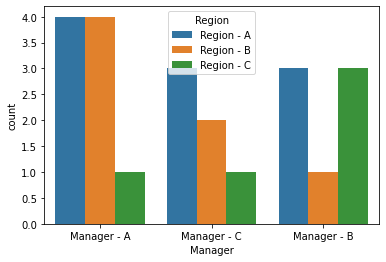

In [15]:
sns.countplot(x='Manager',hue='Region',data=data)